# Medical Dataset - Describing Distributions
- Andrea Cohen
- 03.06.23

## Data
- The features to analyze: 
    - VitD_levels
    - Doc_visits
    - TotalCharge

## Preliminary steps

### Import libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Load the data

In [3]:
medical_df = pd.read_csv('Data/data-6.csv')
pd.set_option('display.max_column', None)
display(medical_df.head())
display(medical_df.info())

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0.0,NaN,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

None

- VitD_levels has no missing values and is datatype float64.
- Doc_visits has no missing values and is datatype int64.
- TotalCharge has no missing values and is datatype float64.

## VitD_levels

### Histogram with a kde

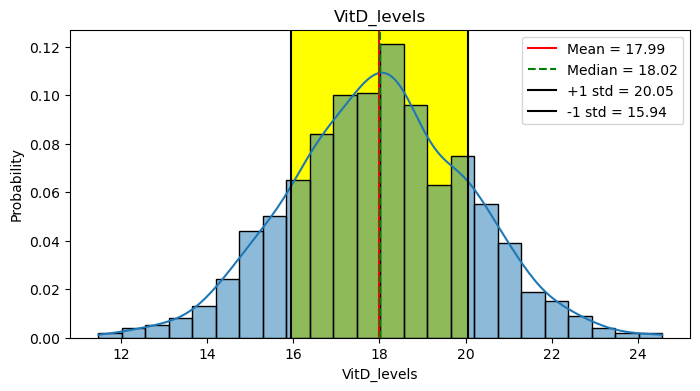

In [28]:
col = 'VitD_levels'
feature = medical_df[col]
mean = feature.mean()
median = feature.median()
mode = feature.mode()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(8, 4))
sns.histplot(data = feature, ax = ax, stat = 'probability', kde = True)
ax.axvline(mean, color = 'red', label = f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black', label = f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

### Is it Discrete or Continuous?

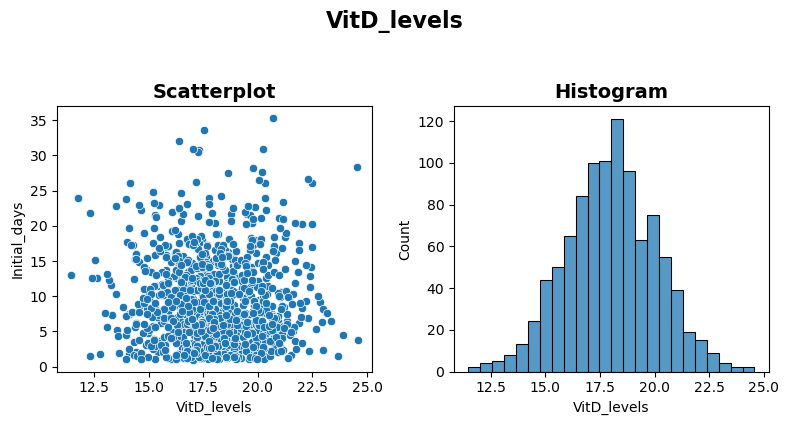

In [29]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (8,4))
sns.scatterplot(data = medical_df, x = 'VitD_levels', y = 'Initial_days', ax = axes[0])
axes[0].set_title('Scatterplot', fontsize = 14, fontweight = 'bold')
sns.histplot(data = medical_df, x = 'VitD_levels', ax = axes[1])
axes[1].set_title('Histogram', fontsize = 14, fontweight = 'bold')
fig.suptitle('VitD_levels', fontsize = 16, fontweight = 'bold', y = 1.05)
fig.tight_layout();

VitD_levels is a continuous distribution.
- all of the values on the scatterplot appear randomly distributed
- there are no vertical columns of markers on the scatterplot
- the histogram bars do not have gaps in between them 

### Does it have a skew? If so, which direction (+/-)

In [30]:
display(mean)
display(median)
display(mode)

17.992380894860002

18.020163095

0      11.475314
1      11.785395
2      12.313590
3      12.325488
4      12.433745
         ...    
995    23.344239
996    23.662948
997    23.906407
998    24.559132
999    24.565463
Name: VitD_levels, Length: 1000, dtype: float64

VitD_levels is a normal distribution.
- the mean and median are almost the same values
- neither the right nor the left tail is long

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [31]:
kurt = stats.kurtosis(medical_df['VitD_levels'], fisher = False)
kurt

3.013147515833447

VitD_levels is leptokurtic.
- kurtosis >3
- the values cluster in the peak of the distribution